In [56]:
import pandas as pd
dfEdges=pd.read_csv("musae_facebook_edges.csv",sep=",")
dfNodes=pd.read_csv("musae_facebook_target.csv",sep=",")
dfEdges

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829
...,...,...
170997,20188,20188
170998,22340,22383
170999,22348,22348
171000,5563,5563


In [57]:
dfNodes

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician
...,...,...,...,...
22465,22465,1379955382222841,Kurt Wiegel MdL,politician
22466,22466,1651527995097082,dubdub Stories,company
22467,22467,155369444540412,Ministerio del Interior - Paraguay,government
22468,22468,175067819212798,Tottus Perú,company


In [233]:
import networkx as nx
G=nx.from_pandas_edgelist(dfEdges,'id_1','id_2')
print(nx.info(G))

Graph with 22470 nodes and 171002 edges


In [238]:
 for n in G.nodes:
        G.nodes[n]['page_type']= dfNodes.page_type[n]

In [5]:
# page_type   {'tvshow': 1, 'government': 1, 'company': 1, 'politician': 1}

In [239]:
partition = {
    'tvshow': set(),
    'government': set(),
    'company': set(),
    'politician': set()
}

for n in G.nodes:
    page_type = G.nodes[n]['page_type']
    partition[page_type].add(n)
    
partition

{'tvshow': {0,
  8192,
  16387,
  16389,
  16391,
  8201,
  16396,
  8208,
  8212,
  8213,
  16404,
  27,
  16416,
  8225,
  8227,
  8230,
  44,
  16431,
  52,
  16437,
  55,
  16445,
  16449,
  68,
  69,
  70,
  8260,
  16452,
  8265,
  16459,
  16460,
  79,
  16468,
  16469,
  16471,
  16472,
  8279,
  8280,
  96,
  8289,
  99,
  16484,
  101,
  8294,
  16486,
  16489,
  16493,
  111,
  8303,
  8308,
  117,
  16502,
  119,
  8310,
  16500,
  8315,
  8317,
  8320,
  8323,
  8325,
  140,
  141,
  16528,
  151,
  152,
  153,
  16543,
  161,
  8353,
  16546,
  8358,
  8364,
  175,
  8369,
  178,
  8375,
  185,
  16571,
  16575,
  16579,
  16581,
  16586,
  8401,
  16597,
  16600,
  8408,
  8416,
  8417,
  226,
  8418,
  8424,
  233,
  8425,
  8432,
  16628,
  8439,
  247,
  16633,
  8442,
  8443,
  8446,
  258,
  16643,
  16644,
  261,
  16646,
  263,
  264,
  265,
  267,
  8459,
  16655,
  274,
  275,
  16658,
  8468,
  16663,
  281,
  282,
  16669,
  8478,
  8479,
  8480,
  16674,
  29

In [240]:
nx.community.is_partition(G, empirical_partition)

True

In [241]:
nx.community.quality.modularity(G, empirical_partition)

0.5250853313167483

In [242]:
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W

empirical_partition = list(partition.values())
modularity(G, empirical_partition)

0.5250853313167484

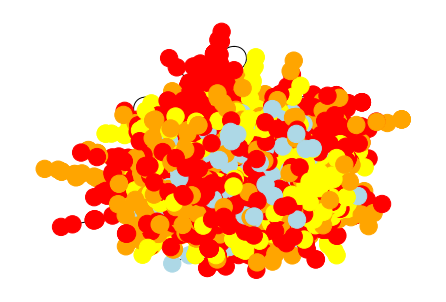

In [64]:
page_type_color = {
    'tvshow': 'orange',
    'government': 'lightblue',
    'company': 'red',
    'politician': 'yellow',
}
node_colors = [page_type_color[G.nodes[n]['page_type']] for n in G.nodes]
nx.draw(G, node_color=node_colors)

In [69]:
partition_map = {}
for idx, cluster_nodes in enumerate(empirical_partition):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

{0: 0,
 8192: 0,
 16387: 0,
 16389: 0,
 16391: 0,
 8201: 0,
 16396: 0,
 8208: 0,
 8212: 0,
 8213: 0,
 16404: 0,
 27: 0,
 16416: 0,
 8225: 0,
 8227: 0,
 8230: 0,
 44: 0,
 16431: 0,
 52: 0,
 16437: 0,
 55: 0,
 16445: 0,
 16449: 0,
 68: 0,
 69: 0,
 70: 0,
 8260: 0,
 16452: 0,
 8265: 0,
 16459: 0,
 16460: 0,
 79: 0,
 16468: 0,
 16469: 0,
 16471: 0,
 16472: 0,
 8279: 0,
 8280: 0,
 96: 0,
 8289: 0,
 99: 0,
 16484: 0,
 101: 0,
 8294: 0,
 16486: 0,
 16489: 0,
 16493: 0,
 111: 0,
 8303: 0,
 8308: 0,
 117: 0,
 16502: 0,
 119: 0,
 8310: 0,
 16500: 0,
 8315: 0,
 8317: 0,
 8320: 0,
 8323: 0,
 8325: 0,
 140: 0,
 141: 0,
 16528: 0,
 151: 0,
 152: 0,
 153: 0,
 16543: 0,
 161: 0,
 8353: 0,
 16546: 0,
 8358: 0,
 8364: 0,
 175: 0,
 8369: 0,
 178: 0,
 8375: 0,
 185: 0,
 16571: 0,
 16575: 0,
 16579: 0,
 16581: 0,
 16586: 0,
 8401: 0,
 16597: 0,
 16600: 0,
 8408: 0,
 8416: 0,
 8417: 0,
 226: 0,
 8418: 0,
 8424: 0,
 233: 0,
 8425: 0,
 8432: 0,
 16628: 0,
 8439: 0,
 247: 0,
 16633: 0,
 8442: 0,
 8443: 0,
 844

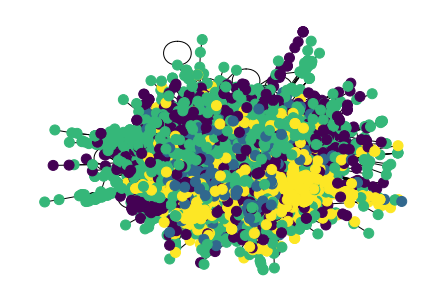

In [70]:
node_colors = [partition_map[n] for n in G.nodes]
nx.draw(G, node_color=node_colors,node_size=100)

In [230]:
# Comparison to a random partition
import random
random_nodes = random.sample(G.nodes, 11000)
random_partition = [set(random_nodes),set(G.nodes) - set(random_nodes)]
random_partition

C:\Users\96656\AppData\Local\Temp/ipykernel_34808/400609955.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(G.nodes, 11000)


[{2,
  4,
  6,
  7,
  8,
  11,
  12,
  15,
  17,
  20,
  21,
  25,
  26,
  27,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  44,
  46,
  49,
  55,
  56,
  57,
  58,
  59,
  60,
  62,
  63,
  64,
  65,
  66,
  68,
  69,
  71,
  74,
  75,
  76,
  81,
  82,
  83,
  89,
  92,
  93,
  94,
  95,
  99,
  101,
  102,
  108,
  109,
  112,
  117,
  118,
  119,
  122,
  124,
  128,
  129,
  131,
  136,
  137,
  138,
  139,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  149,
  150,
  151,
  153,
  154,
  155,
  156,
  159,
  160,
  165,
  167,
  168,
  170,
  171,
  172,
  173,
  177,
  178,
  179,
  180,
  183,
  184,
  185,
  190,
  191,
  192,
  193,
  194,
  195,
  197,
  198,
  200,
  207,
  209,
  211,
  212,
  215,
  218,
  221,
  222,
  223,
  227,
  228,
  229,
  230,
  233,
  237,
  243,
  247,
  248,
  249,
  250,
  251,
  252,
  253,
  254,
  256,
  257,
  258,
  259,
  261,
  262,
  267,
  268,
  269,
  272,
  273,
  274,
  276,
  278,
  280,
  282,
  284,
  287,
 

In [231]:
nx.community.quality.modularity(G, random_partition)

-0.0003298053729970385

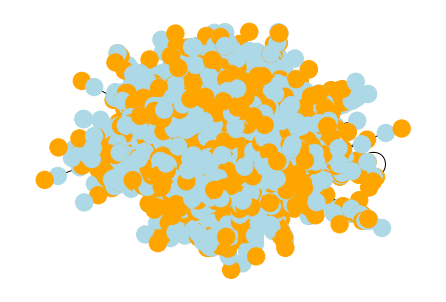

In [232]:
random_node_colors=['orange' if n in random_nodes else 'lightblue' for n in G.nodes]
nx.draw(G,node_color=random_node_colors)